In [34]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics
import statsmodels.formula.api as smf
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

segment_one_train = pd.read_csv('segment_one_train.csv')
segment_one_test = pd.read_csv('segment_one_test.csv')
segment_two_train = pd.read_csv('segment_two_train.csv')
segment_two_test = pd.read_csv('segment_two_test.csv')

# Segment One

In [35]:
X_train = segment_one_train.drop(['is_click','is_open', 'has_clicked', 'has_opened'], axis = 1)
y_train = segment_one_train['is_click']
X_test = segment_one_test.drop(['is_click','is_open', 'has_clicked', 'has_opened'], axis = 1)
y_test = segment_one_test['is_click']

classifier = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=10, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='random')
classifier=classifier.fit(X_train, y_train)
predictions=classifier.predict(X_test)

In [36]:
sklearn.metrics.confusion_matrix(y_test,predictions)

array([[222218,    229],
       [  2520,    249]], dtype=int64)

In [37]:
sklearn.metrics.accuracy_score(y_test, predictions)

0.98779394003978405

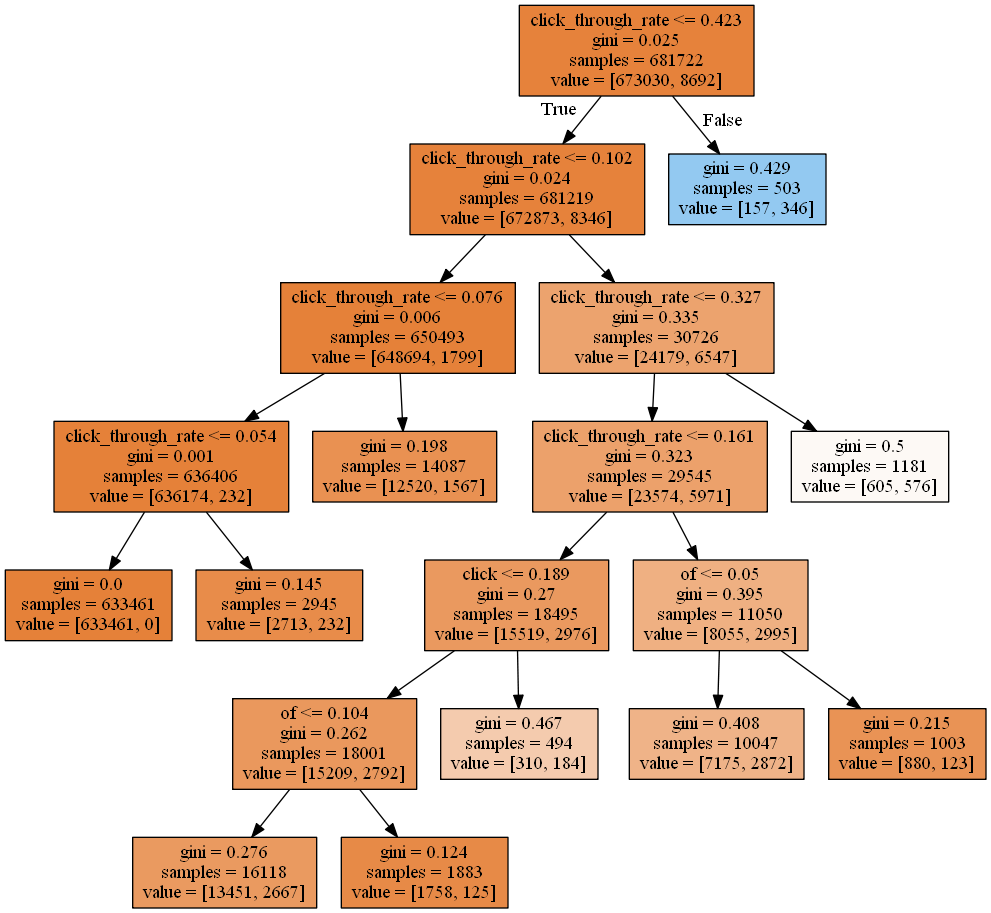

In [38]:
#Displaying the decision tree
from sklearn import tree
#from StringIO import StringIO
from io import StringIO
#from StringIO import StringIO 
from IPython.display import Image
out = StringIO()
tree.export_graphviz(classifier, out_file=out,feature_names = list(X_test.columns), filled = True)
import pydotplus
graph=pydotplus.graph_from_dot_data(out.getvalue())
Image(graph.create_png())

# Segment Two

In [39]:
X_train = segment_two_train.drop(['is_click','is_open'], axis = 1)
y_train = segment_two_train['is_click']
X_test = segment_two_test.drop(['is_click','is_open'], axis = 1)
y_test = segment_two_test['is_click']

classifier = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=10, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='random')
classifier=classifier.fit(X_train, y_train)
predictions=classifier.predict(X_test)

In [40]:
sklearn.metrics.confusion_matrix(y_test,predictions)

array([[36096,     0],
       [  222,     0]], dtype=int64)

In [41]:
sklearn.metrics.accuracy_score(y_test, predictions)

0.99388732859738971

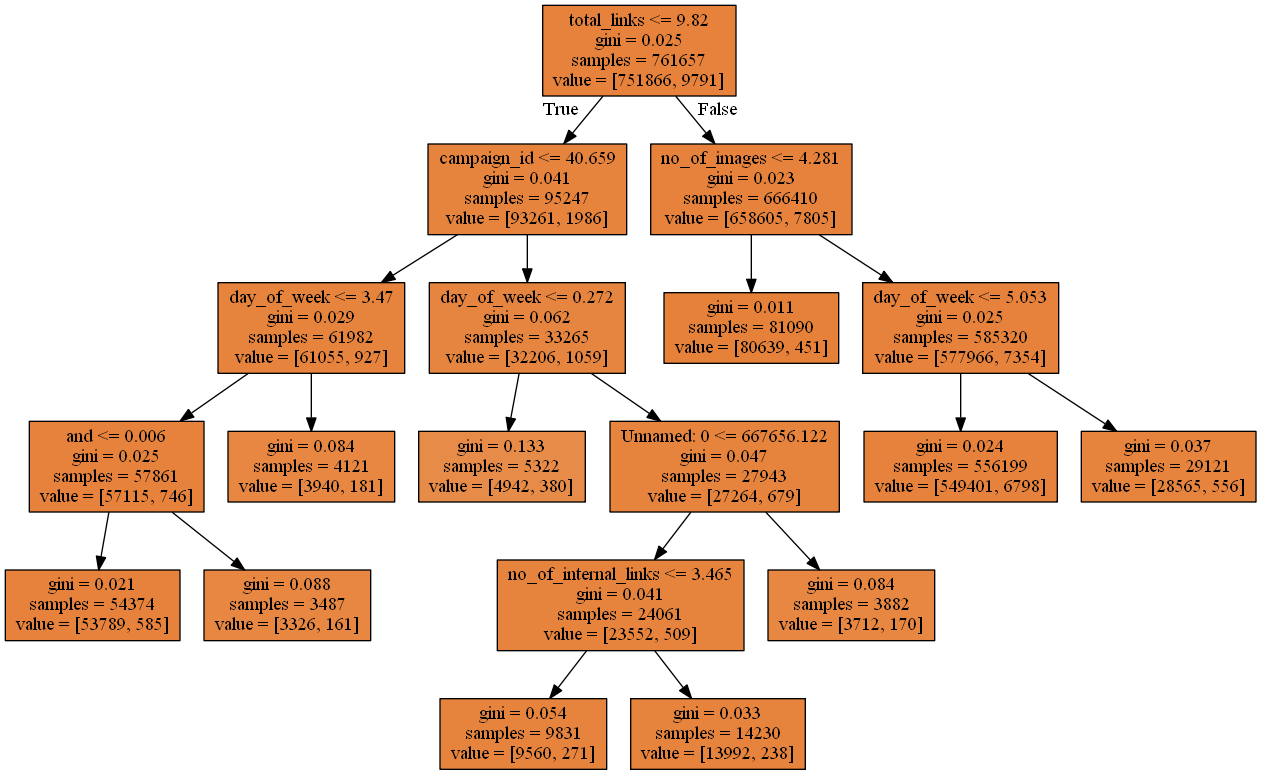

In [42]:
#Displaying the decision tree
from sklearn import tree
#from StringIO import StringIO
from io import StringIO
#from StringIO import StringIO 
from IPython.display import Image
out = StringIO()
tree.export_graphviz(classifier, out_file=out,feature_names = list(X_test.columns), filled = True)
import pydotplus
graph=pydotplus.graph_from_dot_data(out.getvalue())
Image(graph.create_png())